In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("spam (1).csv", encoding='latin1')

In [3]:
df = data

In [4]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

#data cleaning
#frist we have to remove and drop those columns are insufficient 

#handling null values by droping or imputation

In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#have to drop last 3 cloumns beacuse they are insufficient and high null value thats make imbalanced data

In [8]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#In the V1 column, you have two values: ham and spam. In the V2 column, you have the text messages corresponding to these values. task is to find a pattern or relationship in the text that helps identify whether a message is spam or ham.

#also rename column for best interpretation

In [10]:
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

In [11]:
df.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#Label Encoding to convert spam to 1 and ham to 0, so the model can understand the data.

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

In [13]:
df.sample(5)

,label,message
1136,1,Dont forget you can place as many FREE Request...
1546,0,Shant disturb u anymore... Jia you...
2083,0,"you are sweet as well, princess. Please tell m..."
4452,0,Or I guess &lt;#&gt; min
12,1,URGENT! You have won a 1 week FREE membership ...


In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates() #removing duplicates rows

In [16]:
df.shape

(5169, 2)

# Eda and feature engineering

#EDA using for relationship between spam and not spam, like the patterns in the text, important features, and how they affect the classification.

In [17]:
df["label"].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

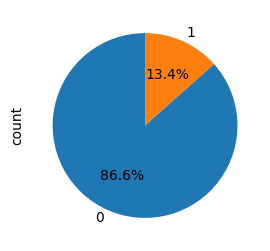

In [18]:
import matplotlib.pyplot as plt
data['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(3,3))
plt.show()

#data is high imbalanced ham have high counts

#We need to create three new columns based on the message column in the dataset: Character Count, Word Count, and Sentence Count. The Character Count will represent the total number of characters in each message, the Word Count will show how many words are there, and the Sentence Count will tell us how many sentences are in each message, typically identified by punctuation like periods, exclamation marks, or question marks. This is important because it allows us to compare spam and ham messages. For instance, spam messages might be longer, with more characters, words, and sentences, whereas ham messages tend to be shorter and more straightforward. By analyzing these counts, we can uncover patterns that could help in identifying whether a message is spam or ham. These new features will improve our ability to build a more accurate spam detection model.

In [19]:
df['char_count'] = df['message'].apply(len)  # Total characters
df['word_count'] = df['message'].apply(lambda x: len(x.split()))  # Total words
df['sentence_count'] = df['message'].apply(lambda x: len([sent for sent in x.split('.') if sent]))  # Total sentences

C:\Users\HP\AppData\Local\Temp\ipykernel_4304\144633094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_count'] = df['message'].apply(len)  # Total characters
C:\Users\HP\AppData\Local\Temp\ipykernel_4304\144633094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['message'].apply(lambda x: len(x.split()))  # Total words
C:\Users\HP\AppData\Local\Temp\ipykernel_4304\144633094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [20]:
df.head(5)

,label,message,char_count,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [21]:
df["message"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

We will calculate the difference in character, word, and sentence counts between ham and spam to see if there's a clear pattern.

In [22]:
# Ham
df[df["label"] == 0][['char_count', 'word_count', 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.903454
std,56.358207,11.116240,1.443042
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,38.000000


In [23]:
# spam
df[df["label"] == 1][['char_count', 'word_count', 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.882083
std,30.137753,5.967672,1.607078
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


Ham messages are shorter, with fewer characters, words, and sentences. On the other hand, Spam messages are longer, with more characters, words, and sentences. This means Spam messages are usually more detailed and lengthy.


In [24]:
import seaborn as sns 

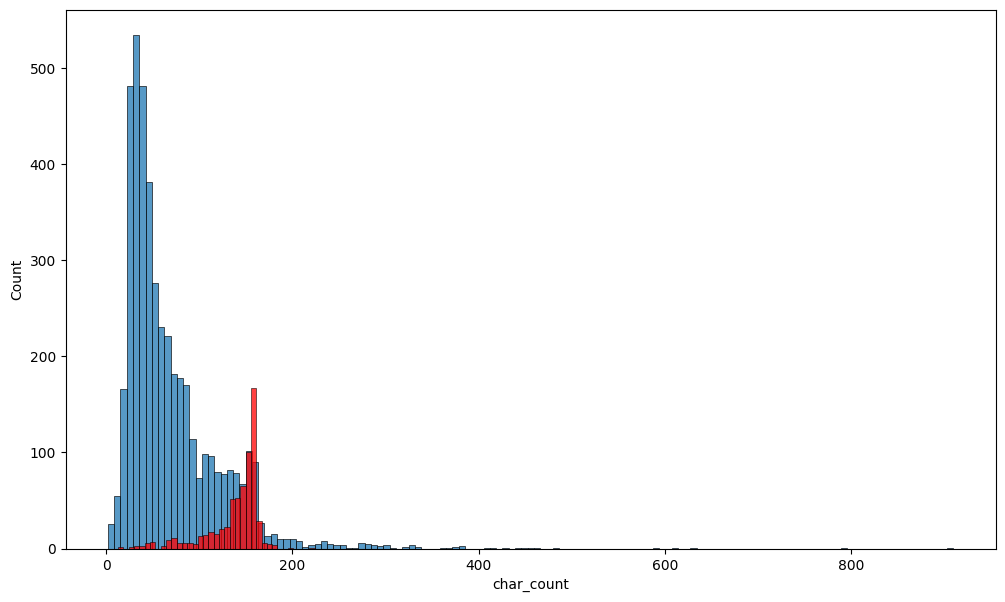

In [25]:
plt.figure(figsize=(12,7))
sns.histplot(df[df["label"] == 0]["char_count"])
sns.histplot(df[df["label"] == 1]["char_count"],color="red")
plt.show()

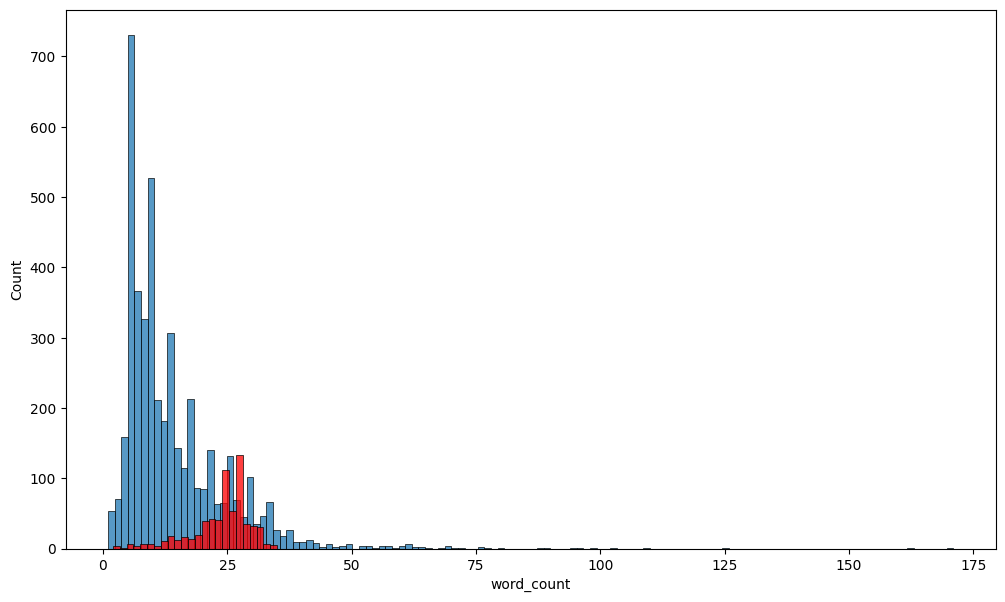

In [26]:
plt.figure(figsize=(12,7))
sns.histplot(df[df["label"] == 0]["word_count"])
sns.histplot(df[df["label"] == 1]["word_count"],color="red")
plt.show()

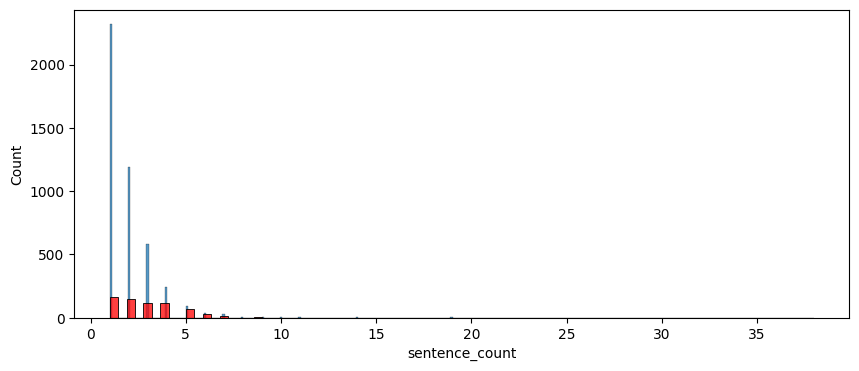

In [27]:
plt.figure(figsize=(10,4))
sns.histplot(df[df["label"] == 0]["sentence_count"])
sns.histplot(df[df["label"] == 1]["sentence_count"],color="red")
plt.show()

In [29]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()

,label,char_count,word_count,sentence_count
label,1.000000,0.384717,0.286576,0.216729
char_count,0.384717,1.000000,0.973667,0.633261
word_count,0.286576,0.973667,1.000000,0.593279
sentence_count,0.216729,0.633261,0.593279,1.000000


<Axes: >

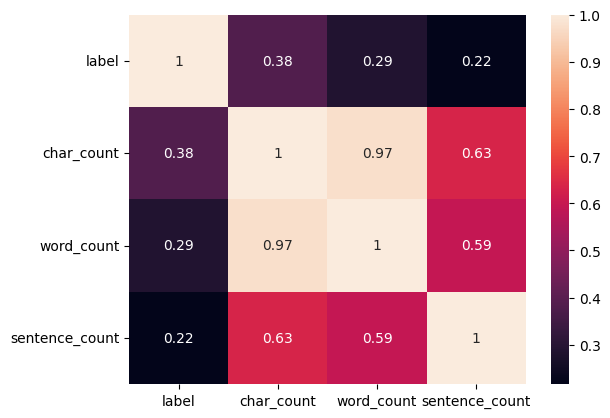

In [30]:
sns.heatmap(numeric_df.corr(),annot=True)

Word count and sentence count are strongly related, so keeping both adds redundancy. Char count, on the other hand, has a positive relationship with spam and doesn't overlap much with the other columns. That's why we'll keep char count and remove the rest.

#text preprocessing  

#frist we should have to convert all text into lower case then saprate each another words , remove special characters ,remove stop words and punctuation then apply steming 

In [31]:
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters and punctuation using regex
    text = re.sub(r'[^\w\s]', '', text) 
    
    # Tokenize by splitting the text into words (spaces as delimiter)
    tokens = text.split()

    # Remove stopwords
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]

    # Apply stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Return the cleaned text (space joined)
    return ' '.join(tokens)


In [32]:
df['cleaned_message'] = df['message'].apply(clean_text)

C:\Users\HP\AppData\Local\Temp\ipykernel_4304\1523030029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_message'] = df['message'].apply(clean_text)


In [33]:
df.sample(3)

,label,message,char_count,word_count,sentence_count,cleaned_message
603,0,Be happy there. I will come after noon,38,8,2,happi come noon
950,0,"Awesome, lemme know whenever you're around",42,6,1,awesom lemm know your
5453,0,Except theres a chick with huge boobs.,38,7,1,there chick huge boob


find the most common words in the "message" column for both "ham" and "spam"

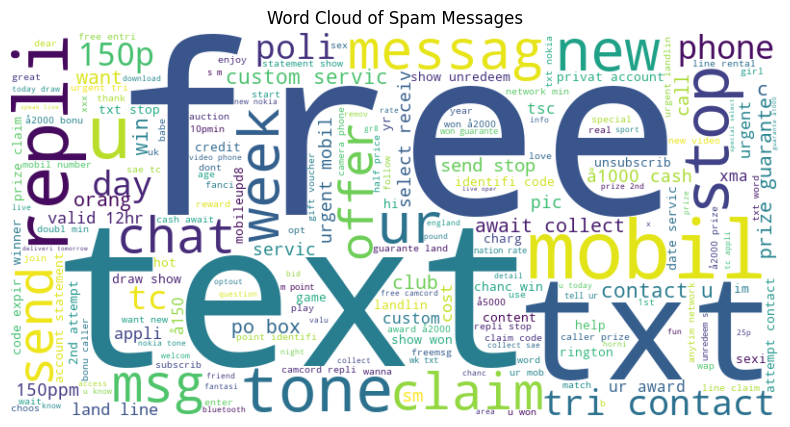

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter spam messages
spam_data = df[df['label'] == 1]

# Combine all spam messages into one string
spam_text = ' '.join(spam_data['cleaned_message'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(spam_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Spam Messages')
plt.show()

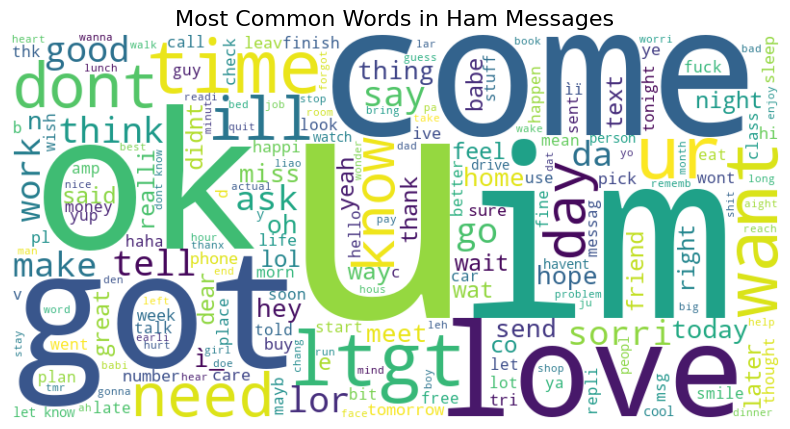

In [35]:
ham_data = df[df['label'] == 0]

# Combine all ham messages into one string
ham_text = ' '.join(ham_data['cleaned_message'])

# Generate a WordCloud for ham messages
ham_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(ham_text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Ham Messages', fontsize=16)
plt.show()

#the top 30 most common words in spam message

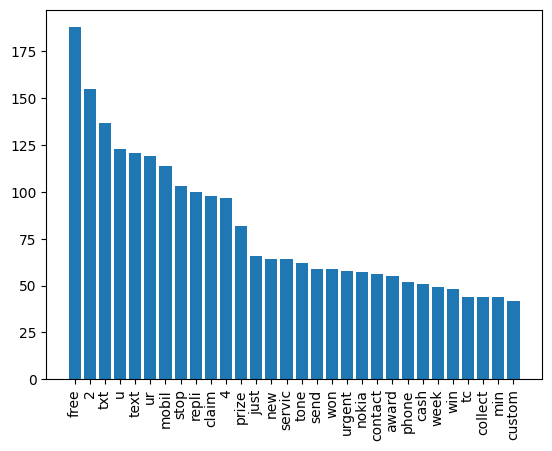

In [36]:
from collections import Counter
import matplotlib.pyplot as plt
spam_data = df[df['label'] == 1]

# Get most common words
words = ' '.join(spam_data['cleaned_message']).split()
word_counts = Counter(words).most_common(30)

words, counts = zip(*word_counts)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.show()

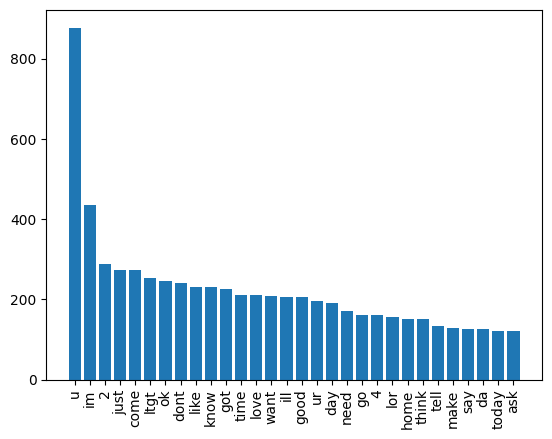

In [37]:
ham_data = df[df['label'] == 0]

# Get most common words
words = ' '.join(ham_data['cleaned_message']).split()
word_counts = Counter(words).most_common(30)

words, counts = zip(*word_counts)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.show()


Now we will build a model, but for that, we need to convert the text input into numbers because the model works with numbers. So, we will convert our cleaned_message input into vectors using a process called vectorization in this doing bag of words

In [38]:
X = df['cleaned_message']
X

0       jurong point crazi avail bugi n great world la...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                             u dun say earli hor u c say
4                             nah dont think goe usf live
                              ...                        
5567    2nd time tri 2 contact u u won å750 pound priz...
5568                             ì_ b go esplanad fr home
5569                              piti mood soani suggest
5570    guy did bitch act like id interest buy week ga...
5571                                            rofl true
Name: cleaned_message, Length: 5169, dtype: object

In [39]:
y = df["label"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)
X_dense = X_vec.toarray()

In [41]:
X_dense.shape

(5169, 7964)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [44]:
gnb.fit(X_train,y_train)
mnb.fit(X_train,y_train)
bnb.fit(X_train,y_train)

BernoulliNB()

In [45]:
y_train_pred1 = gnb.predict(X_train)
y_train_pred2 = mnb.predict(X_train)
y_train_pred3 = bnb.predict(X_train)

In [46]:
print("gnb:",accuracy_score(y_train,y_train_pred1))
print("mnb:",accuracy_score(y_train,y_train_pred2))
print("bnb:",accuracy_score(y_train,y_train_pred3))

gnb: 0.9385731559854897
mnb: 0.9937122128174123
bnb: 0.9801692865779927


In [47]:
y_test_pred1 = gnb.predict(X_test)
y_test_pred2 = mnb.predict(X_test)
y_test_pred3 = bnb.predict(X_test)

In [48]:
print("gnb:",accuracy_score(y_test,y_test_pred1))
print("mnb:",accuracy_score(y_test,y_test_pred2))
print("bnb:",accuracy_score(y_test,y_test_pred3))

gnb: 0.8713733075435203
mnb: 0.9787234042553191
bnb: 0.9700193423597679


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = logreg.predict(X_train)
accuracy_score(y_train,y_pred)

0.9932285368802902

In [52]:
y_pred1 = logreg.predict(X_test)
accuracy_score(y_test,y_pred1)

0.9758220502901354

In [53]:
cm = confusion_matrix(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
precision

1.0

In [54]:
cm

array([[889,   0],
       [ 25, 120]], dtype=int64)

In [56]:
from sklearn.metrics import recall_score

In [57]:
recall_score(y_test, y_pred1)

0.8275862068965517

#this is the performance of model,more to imporve performance frist we do set max top common words then do model hyperparameter tuning

In [58]:
vectorizer2 = CountVectorizer(max_features=3000)
X_vec2 = vectorizer2.fit_transform(X)
X_dense2 = X_vec2.toarray()

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_dense2, y, test_size=0.2, random_state=42)

In [60]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(x_train,y_train)
mnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)
y_train_pred11 = gnb.predict(x_train)
y_train_pred22 = mnb.predict(x_train)
y_train_pred33 = bnb.predict(x_train)
print("gnb:",accuracy_score(y_train,y_train_pred11))
print("mnb:",accuracy_score(y_train,y_train_pred22))
print("bnb:",accuracy_score(y_train,y_train_pred33))

gnb: 0.8964933494558646
mnb: 0.9881499395405079
bnb: 0.9854897218863361


In [61]:
y_test_pred11 = gnb.predict(x_test)
y_test_pred22 = mnb.predict(x_test)
y_test_pred33 = bnb.predict(x_test)
print("gnb:",accuracy_score(y_test,y_test_pred11))
print("mnb:",accuracy_score(y_test,y_test_pred22))
print("bnb:",accuracy_score(y_test,y_test_pred33))

gnb: 0.8694390715667312
mnb: 0.9816247582205029
bnb: 0.9738878143133463


In [62]:
print("gnb:",confusion_matrix(y_test,y_test_pred11))
print("mnb:",confusion_matrix(y_test,y_test_pred22))
print("bnb:",confusion_matrix(y_test,y_test_pred33))

gnb: [[773 116]
 [ 19 126]]
mnb: [[883   6]
 [ 13 132]]
bnb: [[887   2]
 [ 25 120]]


In [63]:
print("gnb:",precision_score(y_test,y_test_pred11))
print("mnb:",precision_score(y_test,y_test_pred22))
print("bnb:",precision_score(y_test,y_test_pred33))

gnb: 0.5206611570247934
mnb: 0.9565217391304348
bnb: 0.9836065573770492


In [64]:
logreg2 = LogisticRegression()
logreg2.fit(x_train, y_train)
y_pred2 = logreg2.predict(x_train)
accuracy_score(y_train,y_pred2)

0.9905683192261185

In [65]:
y_pred4 = logreg2.predict(x_test)
accuracy_score(y_test,y_pred4)

0.97678916827853

In [66]:
cm = confusion_matrix(y_test, y_pred4)
precision = precision_score(y_test, y_pred4)
precision

1.0

In [67]:
cm

array([[889,   0],
       [ 24, 121]], dtype=int64)

In [73]:
# selecting multinomial naive bayes because it hass less type 1 error 

In [68]:
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_and_predict(text):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stop words
    text = ' '.join([ps.stem(word) for word in text.split()])  # Stemming
    
    text_vec = vectorizer2.transform([text])  # Vectorize the text
    return mnb.predict(text_vec)  # Predict using the model

In [69]:
test_text = "Congratulations, you've won a $1000 gift card! Click here to claim."
prediction = preprocess_and_predict(test_text)
print("Prediction:", prediction)

Prediction: [1]


In [70]:
testing = pd.read_csv("C:\\Users\\HP\\OneDrive\\Documents\\Downloads\\spam_messages.csv")

In [71]:
testing.sample(3)

,messages
22,We’ve got the best deals for you. Shop now!
1,"Hey, let's meet tomorrow to discuss the project."
27,Warning: Your subscription will auto-renew tom...


In [72]:
testing['prediction'] = testing['messages'].apply(preprocess_and_predict)
print(testing[['messages', 'prediction']])

                                             messages prediction
0   Congratulations, you've won a $1000 gift card!...        [1]
1    Hey, let's meet tomorrow to discuss the project.        [0]
2     You are selected for a free vacation, call now!        [1]
3   Hey, I wanted to check on the status of our or...        [0]
4    Limited time offer, win a free iPhone, call now!        [1]
5   Special promotion: Buy one get one free, shop ...        [0]
6   Don't miss out! Exclusive deal on electronics,...        [0]
7   Reminder: Your subscription is about to expire...        [1]
8       Important update regarding your bank account.        [1]
9     Free trial for premium services, sign up today!        [1]
10              Buy now and get 50% off on all items!        [0]
11     Click here to get a free gift card worth $100.        [1]
12         You've received a special offer. Act fast!        [1]
13  Your account has been compromised. Reset your ...        [1]
14          Sign up for f